# Topic Modeling/Extraction - Telugu ([తెలుగు](https://en.wikipedia.org/wiki/Telugu_language))
### Notebook Author: Nirupam Purushothama

In [19]:
from nltk.corpus import stopwords 
import string
import gensim
from gensim import corpora
from gensim.summarization import summarize
from gensim.summarization import keywords
from gensim.models import CoherenceModel
import pandas as pd
import numpy as np
from pprint import pprint

import warnings
warnings.filterwarnings("ignore")

In [20]:
from tepy import te_stemmer

In [21]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist

In [22]:
import json
from gensim import models
from nltk import sent_tokenize

In [23]:
def preprocess_simple(sentence):
    return sentence.split()

def preprocess_sentence(sentence):
        return gensim.utils.simple_preprocess(str(sentence), deacc=True)

# This function processes the Cypress docs data by removing newline characters and empty sentences.
def clean(doc):
    # Remove \n and create sentence tokens
    sentence_tokens = sent_tokenize(doc.replace("\n",""))
    # Remove empty sentences
    sentence_tokens = list(filter(lambda x: x != '.', sentence_tokens))
    
    # Cleaned Doc
    s = ""
    
    return s.join(sentence_tokens)

In [85]:
# Define stop words - using nltk
stop_words = stopwords.words('telugu')
stop_words.append("చేత")
stop_words.append("వలన")
stop_words.append("గూర్చి")
stop_words.append("కొరకు")
# stop_words.append("పట్టి")
# stop_words.append("కంటె")
# stop_words.append("లోపల")
stop_words.append("అందు")
stop_words.append("ఓరీ")
stop_words.append("ఓయీ")
stop_words.append("ఓసీ")
stop_words.append("ఈ")
stop_words.append("ఆ")
stop_words.append("నుంచి")
stop_words.append("కూడా")
stop_words.append("మీ")
stop_words.append("నా")
stop_words.append("ఉన్")
stop_words.append("ఒక")
stop_words.append("ఉంది")
stop_words.append("అ")
stop_words.append("కానీ")
stop_words.append("ఇది")
stop_words.append("కోసం")
stop_words.append("త")
stop_words.append("అయితే")
stop_words.append("మ")
stop_words.append("అంటే")
stop_words.append("చాలా")
stop_words.append("ఇలా")
stop_words.append("ఉండే")
stop_words.append("అనే")
stop_words.append("వారి")
stop_words.append("మీరు")
stop_words.append("ఎలా")
stop_words.append("పేరు")
stop_words.append("వీటి")
stop_words.append("ఇప్పు")
stop_words.append("గురించి")
stop_words.append("వర")
stop_words.append("పన్")
stop_words.append("అందు")
stop_words.append("పాటు")
stop_words.append("అన్")
stop_words.append("2")
stop_words.append("ప")
stop_words.append("3")
stop_words.append("4")
stop_words.append("5")
stop_words.append("6")
stop_words.append("7")
stop_words.append("8")
stop_words.append("9")
stop_words.append("10")
stop_words.append("దీ")
stop_words.append('')
stop_words.append('ఓ')
stop_words.append('అని')

In [86]:
# Define functions for stopwords and stemming
# Could have done a pattern match, but felt this might be faster compared to a pattern match. 
# Would consider changing this later. NLTK tokenizer is not working as intended. Hence resorting to this
def clean_word(word):
    word = word.replace("\u200c","")
    word = word.replace(":","")
    word = word.replace(",","")
    word = word.replace(";","")
    word = word.replace("`","")
    word = word.replace("'","")
    word = word.replace(".","")
    word = word.replace("\"","")
    word = word.replace("\\","")
    word = word.replace("\n","")
    word = word.replace("/n","")
    word = word.replace("#","")
    word = word.replace("%","")
    word = word.replace("&","")
    word = word.replace("*","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("{","")
    word = word.replace("}","")
    word = word.replace("[","")
    word = word.replace("=","")
    word = word.replace("]","")
    word = word.replace("-","")
    word = word.replace("_","")
    word = word.replace("+","")
    word = word.replace("‘","")
    word = word.replace("?","")
    word = word.replace("!","")
    word = word.replace("~","")
    
    return word

def remove_stopwords(texts):
    #return [[clean_word(word) for word in doc if word not in stop_words] for doc in texts]
    texts_out = []
    for sent in texts:
        texts = []
        for word in sent:
            c_word = clean_word(word)
            
            if(c_word != None and c_word != "" and len(c_word) > 0 and c_word not in stop_words):
                texts.append(c_word)

        texts_out.append(texts)
    
    return texts_out

# Perform stemming using the vibhakti remover
def stemming(texts):
    texts_out = []
    for sent in texts:
        texts = []
        for word in sent:
            c_word = clean_word(te_stemmer(word))
            
            if(c_word != None and c_word != "" and len(c_word) > 0):
                texts.append(c_word)

        texts_out.append(texts)
    
    return texts_out

In [87]:
fp = open("../crawler_scraper/hash2text_1.json")
data1 = json.load(fp)
fp.close()

fp = open("../crawler_scraper/hash2text_2.json")
data2 = json.load(fp)
fp.close()

fp = open("../crawler_scraper/hash2text_3.json")
data3 = json.load(fp)
fp.close()

fp = open("../crawler_scraper/hash2text_4.json")
data4 = json.load(fp)
fp.close()

data = {**data1, **data2, **data3, **data4}

texts = []
for k,v in data.items():
    texts.append(v.split())

In [88]:
#texts = stemming(texts)
texts = remove_stopwords(texts)

Total unique words in corpus:  386705


<IPython.core.display.Javascript object>


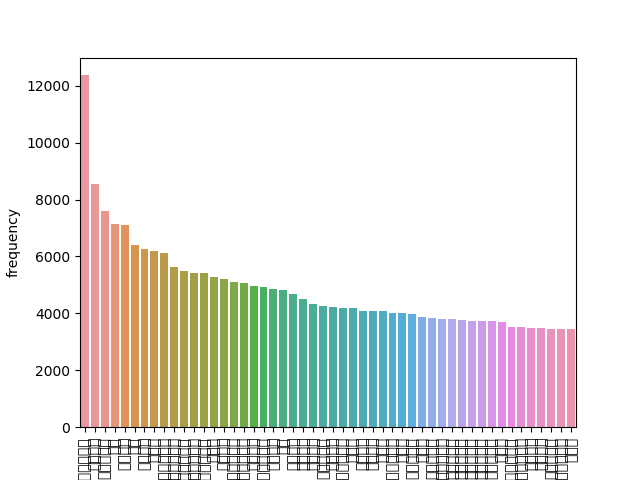

In [89]:
all_words = []
[all_words.extend(text) for text in texts]
fdist = FreqDist(all_words)

print("Total unique words in corpus: ", len(fdist))

# Plot the top 50 used words in the corpus
aw_df = pd.DataFrame([(k, v) for k,v in fdist.items()])
aw_df.columns = ['term','frequency']

aw_df.sort_values(by=['frequency'], ascending = False, inplace=True)
aw_df = aw_df.reset_index() 

%matplotlib notebook
word_hist = sns.barplot(x='term', y='frequency', data=aw_df[:50])
for item in word_hist.get_xticklabels():
    item.set_rotation(90)

In [90]:
k = 9727
top_k_words = fdist.most_common(k)
print(top_k_words[:10])
top_k_words[-10:]

[('ఉంటుంది', 12369), ('ఉన్న', 8531), ('రెండు', 7589), ('మా', 7144), ('వల్ల', 7104), ('మన', 6386), ('నేను', 6278), ('అది', 6189), ('కొన్ని', 6114), ('ఉంటాయి', 5616)]


[('ఉష్ణోగ్రతలో', 49),
 ('తీర', 49),
 ('తీసుకుంటున్నాయి', 49),
 ('సెంటీమీటర్ల', 49),
 ('ఆహ్లాదకరంగా', 49),
 ('వేళ్లను', 49),
 ('శత్రు', 49),
 ('అలవోకగా', 49),
 ('స్కూటర్', 49),
 ('వ్యక్తితో', 49)]

In [91]:
# define a function only to keep words in the top k words
top_k_words,_ = zip(*fdist.most_common(k))
top_k_words = set(top_k_words)
def keep_top_k_words(text):
    return [word for word in text if word in top_k_words]


# Process to keep only those words that we wish to consider

texts_2 = []

for text in texts:
    texts_2.append(keep_top_k_words(text))
    

# drop those with less than 40 words in the sentence
texts_3 = []

new2oldindex_map = {}

old_index = 0
new_index = 0

for text in texts_2:
    if(len(text) >= 40):
        new2oldindex_map[new_index] = old_index
        texts_3.append(text)
        new_index += 1
        
    old_index += 1
        
print("Total docs before processing: ", len(texts))
print("Total docs after processing: ", len(texts_3))

Total docs before processing:  18777
Total docs after processing:  12610


In [92]:
# Create Dictionary
id2word = corpora.Dictionary(texts_3)

# Create Corpus
texts = texts_3

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Get the TF-IDF Conversion - Not using TF-IDF for our model. But if we need to use it then just change 
# corpus to corpus_tfidf and rest of the steps are the same.
# tfidf = models.TfidfModel(corpus)
# corpus_tfidf = tfidf[corpus]

In [93]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Low alpha => documents have only a low number of topics contributing to them
        # Low eta => topics have a low number of words contributing to them
#         model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
#                                                    id2word=id2word,
#                                                    num_topics=num_topics,
#                                                    passes=50,
#                                                    #alpha=1e-2,
#                                                    #eta=0.5e-2,
#                                                    alpha="asymmetric",
#                                                    random_state=12)
        
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics=num_topics,
                                                   passes=50,
                                                   #alpha=1e-2,
                                                   #eta=0.5e-2,
                                                   alpha="auto",
                                                   random_state=12)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

<IPython.core.display.Javascript object>


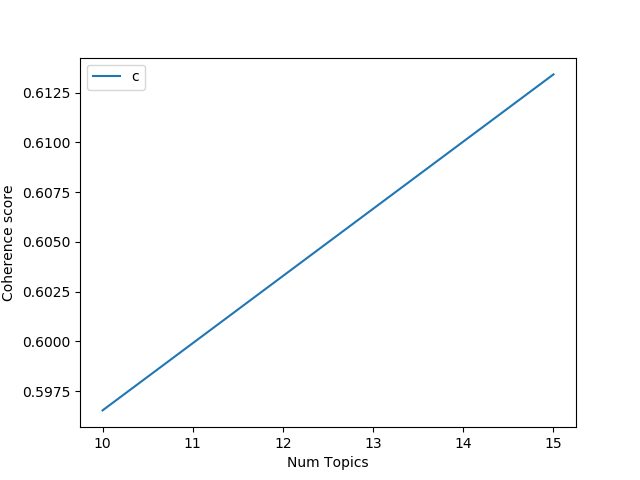

In [95]:
%matplotlib notebook

limit=16; start=10; step=5;
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, 
                                                       start=start, limit=limit, step=step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [96]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 10  has Coherence Value of 0.5965
Num Topics = 15  has Coherence Value of 0.6134


In [99]:
# Select the optimal model and check the topics (if required)
optimal_model = model_list[1]
#model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics())

[(0,
  '0.011*"చేసి" + 0.008*"ఫోన్" + 0.006*"కారు" + 0.006*"చేస్తే" + '
  '0.006*"ద్వారా" + 0.006*"పని" + 0.005*"వివరాలు" + 0.005*"ఉన్న" + '
  '0.005*"మొబైల్" + 0.005*"కొత్త"'),
 (1,
  '0.010*"చేశారు" + 0.009*"మంది" + 0.007*"చెందిన" + 0.005*"ప్రభుత్వం" + '
  '0.005*"ఉన్న" + 0.005*"ఆయన" + 0.005*"చేసిన" + 0.004*"హైదరాబాద్" + '
  '0.004*"ఇక్కడ" + 0.004*"ఏర్పాటు"'),
 (2,
  '0.008*"విద్యార్థులు" + 0.008*"కోర్సు" + 0.008*"అర్హత" + 0.007*"ఉంటుంది" + '
  '0.006*"మంచి" + 0.006*"ప్రతి" + 0.006*"వంటి" + 0.006*"ఎక్కువ" + '
  '0.006*"కోర్సులు" + 0.005*"ఉన్న"'),
 (3,
  '0.020*"నేను" + 0.016*"నాకు" + 0.013*"మా" + 0.012*"ఆమె" + 0.012*"తన" + '
  '0.007*"అది" + 0.007*"నన్ను" + 0.007*"అలా" + 0.006*"ఆయన" + 0.006*"నాన్న"'),
 (4,
  '0.017*"మా" + 0.008*"అలా" + 0.007*"ఉద్యోగం" + 0.006*"అందుకే" + '
  '0.006*"శిక్షణ" + 0.006*"సంస్థ" + 0.006*"మేం" + 0.005*"దాంతో" + '
  '0.005*"వారికి" + 0.005*"సాయం"'),
 (5,
  '0.011*"కాబట్టి" + 0.009*"మన" + 0.009*"ఉంటుంది" + 0.008*"అవసరం" + '
  '0.008*"సమస్య" + 0.007*"మనం" + 0.0

In [100]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.105526 -0.053230       1        1  12.501783
3      0.039519  0.128296       2        1  12.214806
4     -0.039738 -0.002156       3        1   9.638598
11     0.110786 -0.064152       4        1   9.032911
14     0.165124 -0.110458       5        1   7.824243
12     0.183496 -0.059721       6        1   7.723346
1     -0.225673  0.029507       7        1   7.034690
2     -0.083616 -0.065366       8        1   6.214339
0     -0.047778 -0.090324       9        1   5.878686
10     0.216492 -0.032829      10        1   5.438456
6     -0.244831 -0.043043      11        1   4.504297
7      0.037059 -0.105279      12        1   3.926607
8     -0.161491 -0.071232      13        1   3.807703
13    -0.153912  0.122032      14        1   2.367180
9      0.099039  0.417954      15        1   1.892361, topic_info=     Category          Freq       Term         Total  loglift  logprob
1015  Default   7323.000000         మా   7323.000000  30.0000  30.0000
485   Default   6777.000000       నేను   6777.000000  29.0000  29.0000
1041  Default   2107.000000        the   2107.000000  28.0000  28.0000
1746  Default   4984.000000       నాకు   4984.000000  27.0000  27.0000
4592  Default   2301.000000       బీమా   2301.000000  26.0000  26.0000
405   Default   5298.000000        ఆమె   5298.000000  25.0000  25.0000
39    Default   2538.000000       వేసి   2538.000000  24.0000  24.0000
424   Default   4591.000000         తన   4591.000000  23.0000  23.0000
121   Default  12202.000000    ఉంటుంది  12202.000000  22.0000  22.0000
73    Default   7370.000000      రెండు   7370.000000  21.0000  21.0000
6744  Default   1719.000000      మదుపు   1719.000000  20.0000  20.0000
320   Default   2458.000000     ఆర్థిక   2458.000000  19.0000  19.0000
492   Default   3274.000000       మీకు   3274.000000  18.0000  18.0000
914   Default   4132.000000      సమస్య   4132.000000  17.0000  17.0000
7483  Default   1299.000000          a   1299.000000  16.0000  16.0000
255   Default   5195.000000       వంటి   5195.000000  15.0000  15.0000
1638  Default   2637.000000      కలిపి   2637.000000  14.0000  14.0000
1432  Default   5341.000000        అలా   5341.000000  13.0000  13.0000
23    Default   1721.000000       నూనె   1721.000000  12.0000  12.0000
8194  Default   1530.000000         to   1530.000000  11.0000  11.0000
54    Default   1694.000000      చెంచా   1694.000000  10.0000  10.0000
1525  Default   1652.000000  పెట్టుబడి   1652.000000   9.0000   9.0000
8610  Default   1203.000000          I   1203.000000   8.0000   8.0000
611   Default   2391.000000        ఆఫ్   2391.000000   7.0000   7.0000
452   Default   7320.000000       వల్ల   7320.000000   6.0000   6.0000
1628  Default   1929.000000       అండ్   1929.000000   5.0000   5.0000
76    Default   4182.000000       వరకూ   4182.000000   4.0000   4.0000
1740  Default   5425.000000    కాబట్టి   5425.000000   3.0000   3.0000
364   Default   1314.000000      పన్ను   1314.000000   2.0000   2.0000
422   Default   2411.000000     చేశారు   2411.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
1040  Topic15    928.344055         of    929.317505   3.9663  -3.8329
7701  Topic15    782.913513        you    783.886963   3.9661  -4.0033
9166  Topic15    734.155701         in    735.129150   3.9660  -4.0676
9006  Topic15    689.882507        and    690.855957   3.9659  -4.1298
9165  Topic15    635.897705         he    636.871155   3.9658  -4.2113
9583  Topic15    575.258179         He    576.231628   3.9657  -4.3115
9167  Topic15    573.259399         it    574.232849   3.9656  -4.3150
1037  Topic15    524.380310        for    525.353760   3.9655  -4.4041
1038  Topic15    480.903259        him    481.876740   3.9653  -4.4906
9010  Topic15    457.656647       that    458.630127   3.9652  -4.5402
1035  Topic15    410.989777         at    411.963257   3.

In [110]:
# Test the model on a new document. Took this from Sakshi
# https://www.sakshi.com/news/sports/india-play-new-zealand-after-topping-league-stage-1204599
new_sentence = """
ప్రపంచ కప్‌ ఆసాంతం నిరాశజనక ప్రదర్శన కనబర్చిన దక్షిణాఫ్రికా తమ ఆఖరి మ్యాచ్‌లో డిఫెండింగ్‌ చాంపియన్‌ ఆస్ట్రేలియాను ఓడించింది. శనివారం ఇక్కడ జరిగిన ప్రపంచ కప్‌ చివరి లీగ్‌ మ్యాచ్‌లో దక్షిణాఫ్రికా 10 పరుగుల తేడాతో ఆస్ట్రేలియాపై గెలిచింది. ప్రపంచకప్‌ మ్యాచ్‌లో ఆస్ట్రేలియాపై దక్షిణాఫ్రికా గెలవడం 1992 తర్వాత ఇదే తొలిసారి. 326 పరుగుల విజయలక్ష్యంతో బరిలోకి దిగిన ఆస్ట్రేలియా 49.5 ఓవర్లలో 315 పరుగులకు ఆలౌటై  ఓడిపోయింది.

ఓపెనర్‌ డేవిడ్‌ వార్నర్‌ (117 బంతుల్లో 122; 15 ఫోర్లు, 2 సిక్స్‌లు) అద్భుత సెంచరీ చేసినా... అలెక్స్‌ క్యారీ (69 బంతుల్లో 85; 11 ఫోర్లు, సిక్స్‌) మెరిసినా ఫలితం లేకపోయింది. ఫించ్‌ (3), స్మిత్‌ (7), స్టొయినిస్‌ (22), మ్యాక్స్‌వెల్‌ (12) తక్కువ స్కోరుకే వెనుదిరిగారు. దక్షిణాఫ్రికా బౌలర్లలో రబడ (3/56), ప్రిటోరియస్‌ (2/27), ఫెలుక్వాయో (2/22) రాణించారు. 4 వికెట్లకు 119 పరుగులతో కష్టాల్లో పడిన ఆసీస్‌ను వార్నర్‌ ఆదుకున్నాడు. అలెక్స్‌ క్యారీతో కలిసి ఐదో వికెట్‌కు 108 పరుగులు జోడించాడు.

దక్షిణాఫ్రికా శిబిరంలో ఆందోళన పెంచాడు. అయితే 40వ ఓవర్లో ప్రిటోరియస్‌ బౌలింగ్‌లో మోరిస్‌ కళ్లు చెదిరే క్యాచ్‌ పట్టడంతో వార్నర్‌ ఔటయ్యాడు. దాంతో ఆసీస్‌ జట్టు విజయంపై ఆశలు  వదులుకుంది. అంతకుముందు టాస్‌ గెలిచి బ్యాటింగ్‌ ఎంచుకున్న దక్షిణాఫ్రికా నిర్ణీత 50 ఓవర్లలో 6 వికెట్ల నష్టానికి 325 పరుగులు చేసింది. కెప్టెన్‌ డు ప్లెసిస్‌ (94 బంతుల్లో 100; 7 ఫోర్లు, 2 సిక్స్‌లు) చక్కటి సెంచరీ సాధించాడు. డుసెన్‌ (97 బంతుల్లో 95; 4 ఫోర్లు, 4 సిక్స్‌ల) త్రుటిలో సెంచరీ అవకాశం చేజార్చుకున్నాడు.

ఓపెనర్‌ డికాక్‌ (51 బంతుల్లో 52; 7 ఫోర్లు) అర్ధ సెంచరీ చేశాడు. ఆసీస్‌ బౌలర్లలో స్టార్క్‌ (2/59), లయన్‌ (2/53) రెండేసి వికెట్లు తీశారు.  లీగ్‌ దశ మ్యాచ్‌లు ముగిశాక భారత్‌ 15 పాయింట్లతో టాప్‌ ర్యాంక్‌లో నిలువగా... 14 పాయింట్లతో ఆస్ట్రేలియా రెండో స్థానంలో నిలిచింది. 12 పాయింట్లతో ఇంగ్లండ్‌ మూడో స్థానంలో, 11 పాయింట్లతో న్యూజిలాండ్‌ నాలుగో స్థానంలో నిలిచాయి. ఈనెల 9న మాంచెస్టర్‌లో జరిగే తొలి సెమీఫైనల్లో న్యూజిలాండ్‌తో భారత్‌; బర్మింగ్‌హామ్‌లో 11న జరిగే రెండో సెమీఫైనల్లో ఇంగ్లండ్‌తో ఆస్ట్రేలియా తలపడతాయి.
"""

In [122]:
bow = id2word.doc2bow([clean_word(word) for word in new_sentence.split()])
topics = sorted(optimal_model.get_document_topics(bow=bow), key=lambda x: (x[1]), reverse=True)

# Print the top topic and its associated percentage
print("Top topic: ", optimal_model.show_topic(topics[0][0]))
print("Associated %: ", np.round(topics[0][1]*100,2), "%")

Top topic:  [('భారత', 0.010455191), ('క్రికెట్', 0.010114397), ('జరిగిన', 0.008513711), ('పోటీల్లో', 0.008468443), ('తన', 0.008360771), ('అంతర్జాతీయ', 0.007960853), ('ప్రపంచ', 0.0076683215), ('జట్టు', 0.0075330427), ('ప్రపంచకప్లో', 0.006588675), ('సాధన', 0.0064721834)]
Associated %:  81.71 %
